# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters

In [10]:
# Data name and path
data_name = "decarbonation.jsonl"
data_path = "../data/"

# Date aggregation frequency
# Examples: 1 day   = "1D"
#           2 days  = "2D"
#           1 week  = "1W"
#           1 month = "1M"
freq = "1M"

# Plot

Found 760 articles


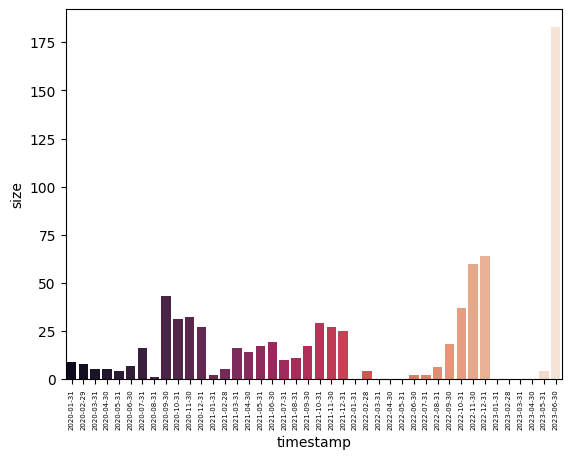

In [11]:
df = pd.read_json(data_path+data_name, lines=True)
print(f"Found {len(df)} articles")

df["timestamp"] = pd.to_datetime(df["timestamp"])
df.loc[0, "timestamp"] = df["timestamp"].iloc[0].normalize()

count = df.groupby(pd.Grouper(key="timestamp", freq=freq), as_index=False).size()
count["timestamp"] = count["timestamp"].dt.strftime('%Y-%m-%d')

plt.figure()
plt.xticks(rotation=90, fontsize=5)
fig = sns.barplot(data=count, x="timestamp", y="size", palette="rocket")